In [24]:
from pandas_datareader import wb 
import pandas_datareader as pdt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
data = wb.download(indicator=['NY.GDP.MKTP.KD.ZG','FP.CPI.TOTL.ZG','NE.TRD.GNFS.ZS','SL.TLF.ACTI.ZS','NV.IND.TOTL.ZS','FM.LBL.BMNY.ZG','BX.KLT.DINV.WD.GD.ZS'], country=['VN'], start=1996, end=2022)
df=data.rename(columns={'NY.GDP.MKTP.KD.ZG':'GDP','FP.CPI.TOTL.ZG':'INF','NE.TRD.GNFS.ZS':'TRADE','SL.TLF.ACTI.ZS':'H','NV.IND.TOTL.ZS':'IND','FM.LBL.BMNY.ZG':'M','BX.KLT.DINV.WD.GD.ZS':'FDI'})
df

GDP        INF       TRADE      H        IND          M  \
country year                                                                 
Vietnam 2021  2.561551   1.834716  186.468183    NaN  37.476236        NaN   
        2020  2.865412   3.220934  163.245857    NaN  36.743712  13.633490   
        2019  7.359281   2.795824  164.704221  83.09  36.803132  13.621302   
        2018  7.464991   3.539628  164.663940  83.21  36.542440  12.698384   
        2017  6.940188   3.520257  160.980072  82.66  35.390366  14.256368   
        2016  6.690009   2.668248  145.409507  82.16  34.115237  17.880357   
        2015  6.987167   0.631201  144.914220  82.42  34.266538  14.908440   
        2014  6.422247   4.084554  135.410512  82.49  35.298576  19.740018   
        2013  5.553500   6.592675  130.846344  82.26  35.575154  21.399470   
        2012  5.504546   9.094703  123.224126  81.28  35.860244  24.544748   
        2011  6.413178  18.677732  125.260589  81.02  34.580400  11.942446   
        2010  6.423238   9.207466  113.977695  80.83  33.022878  29.714607   
        2009  5.397898   6.716983  134.706318  80.60  37.388186  26.232670   
        2008  5.661771  23.115448  154.317480  80.67  37.077696  20.697527   
        2007  7.129504   8.344449  154.605384  80.80  38.511625  49.105997   
        2006  6.977955   7.418017  138.313622  80.99  38.584731  29.670796   
        2005  7.547248   8.284572  130.714846  81.16  38.131140  30.906710   
        2004  7.536411   7.754947  133.016498  81.36  40.208750  31.049976   
        2003  6.899063   3.234648  124.327954  81.55  39.470008  33.052044   
        2002  6.320821   3.830828  116.696869  81.70  38.486679  13.274535   
        2001  6.192893  -0.431545  111.955938  81.81  38.129422  27.336462   
        2000  6.787316  -1.710337  111.417094  81.90  36.730775  35.419318   
        1999  4.773587   4.117102  102.787407  82.02  34.494752  66.451597   
        1998  5.764455   7.266198   97.001249  82.03  32.491268  23.809449   
        1997  8.152084   3.209526   94.344484  82.07  32.075135  25.292109   
        1996  9.340017   5.675000   92.705747  82.18  29.729889  25.795255   

                   FDI  
country year            
Vietnam 2021  4.277081  
        2020  4.558362  
        2019  4.821075  
        2018  4.998283  
        2017  5.011487  
        2016  4.900893  
        2015  4.931907  
        2014  3.940862  
        2013  4.164545  
        2012  4.278323  
        2011  4.304875  
        2010  5.434740  
        2009  7.168820  
        2008  9.663039  
        2007  8.654718  
        2006  3.616001  
        2005  3.390404  
        2004  3.544081  
        2003  3.666012  
        2002  3.992687  
        2001  3.977335  
        2000  4.163924  
        1999  4.922663  
        1998  6.141214  
        1997  8.270097  
        1996  9.713081

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26 entries, ('Vietnam', '2021') to ('Vietnam', '1996')
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     26 non-null     float64
 1   INF     26 non-null     float64
 2   TRADE   26 non-null     float64
 3   H       24 non-null     float64
 4   IND     26 non-null     float64
 5   M       25 non-null     float64
 6   FDI     26 non-null     float64
dtypes: float64(7)
memory usage: 2.9+ KB


In [5]:
missing_columns = ["H", "M"]

In [6]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [7]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [8]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [9]:
deter_data.head()

DetH       DetM
country year                      
Vietnam 2021  82.351347  37.666512
        2020  82.253252  13.633490
        2019  83.090000  13.621302
        2018  83.210000  12.698384
        2017  82.660000  14.256368

In [10]:
df['H1']=deter_data['DetH']
df['M1']=deter_data['DetM']
df.head()

GDP       INF       TRADE      H        IND          M  \
country year                                                                
Vietnam 2021  2.561551  1.834716  186.468183    NaN  37.476236        NaN   
        2020  2.865412  3.220934  163.245857    NaN  36.743712  13.633490   
        2019  7.359281  2.795824  164.704221  83.09  36.803132  13.621302   
        2018  7.464991  3.539628  164.663940  83.21  36.542440  12.698384   
        2017  6.940188  3.520257  160.980072  82.66  35.390366  14.256368   

                   FDI  H_imp      M_imp         H1         M1  
country year                                                    
Vietnam 2021  4.277081  82.49  66.451597  82.351347  37.666512  
        2020  4.558362  82.02  13.633490  82.253252  13.633490  
        2019  4.821075  83.09  13.621302  83.090000  13.621302  
        2018  4.998283  83.21  12.698384  83.210000  12.698384  
        2017  5.011487  82.66  14.256368  82.660000  14.256368

In [11]:
df2=df[['GDP','INF','TRADE','H1','IND','M1','FDI']]
df2.head()

GDP       INF       TRADE         H1        IND         M1  \
country year                                                                    
Vietnam 2021  2.561551  1.834716  186.468183  82.351347  37.476236  37.666512   
        2020  2.865412  3.220934  163.245857  82.253252  36.743712  13.633490   
        2019  7.359281  2.795824  164.704221  83.090000  36.803132  13.621302   
        2018  7.464991  3.539628  164.663940  83.210000  36.542440  12.698384   
        2017  6.940188  3.520257  160.980072  82.660000  35.390366  14.256368   

                   FDI  
country year            
Vietnam 2021  4.277081  
        2020  4.558362  
        2019  4.821075  
        2018  4.998283  
        2017  5.011487

In [12]:
df2 = df2.reset_index(level='country')
df2.head()

,country,GDP,INF,TRADE,H1,IND,M1,FDI
year,,,,,,,,
2021,Vietnam,2.561551,1.834716,186.468183,82.351347,37.476236,37.666512,4.277081
2020,Vietnam,2.865412,3.220934,163.245857,82.253252,36.743712,13.633490,4.558362
2019,Vietnam,7.359281,2.795824,164.704221,83.090000,36.803132,13.621302,4.821075
2018,Vietnam,7.464991,3.539628,164.663940,83.210000,36.542440,12.698384,4.998283
2017,Vietnam,6.940188,3.520257,160.980072,82.660000,35.390366,14.256368,5.011487


<AxesSubplot:xlabel='year'>

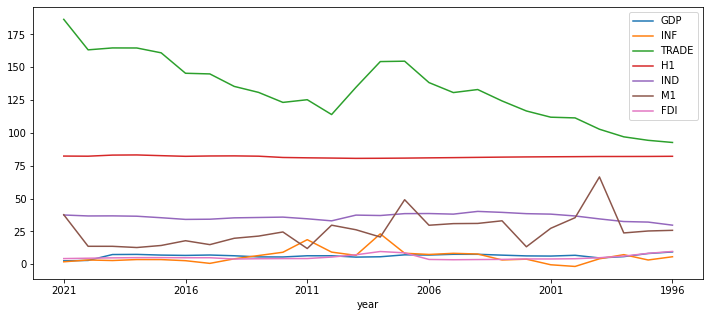

In [13]:
df2['GDP'].plot(figsize=(12,5),legend=True)
df2['INF'].plot(legend=True)
df2['TRADE'].plot(legend=True)
df2['H1'].plot(legend=True)
df2['IND'].plot(legend=True)
df2['M1'].plot(legend=True)
df2['FDI'].plot(legend=True)

In [14]:
df3=df2[['GDP','INF','TRADE','H1','IND','M1','FDI']]

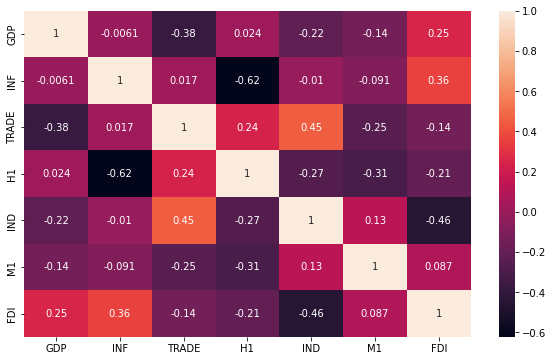

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [17]:
adf_test(df2['GDP'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -5.399534
p-value                  0.000003
# lags used              1.000000
# observations          24.000000
critical value (1%)     -3.737709
critical value (5%)     -2.992216
critical value (10%)    -2.635747
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [18]:
adf_test(df2['INF'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.912310
p-value                  0.043935
# lags used              9.000000
# observations          16.000000
critical value (1%)     -3.924019
critical value (5%)     -3.068498
critical value (10%)    -2.673893
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
X=df2[['INF','TRADE','H1','IND','M1','FDI']]
y=df2['GDP']

In [74]:
X1=df2[['GDP','TRADE','H1','IND','M1','FDI']]
y1=df2['INF']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 12)

In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state= 12)

In [27]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

In [116]:
model_linear.fit(X_train1, y_train1)
yhat_test1 = model_linear.predict(X_test1)

In [117]:
df_temp = pd.DataFrame({'Actual': y_test1, 'Predicted': yhat_test1})
df_temp.head()

,Actual,Predicted
year,,
2001,-0.431545,4.692925
2014,4.084554,2.878764
2002,3.830828,7.552081
2020,3.220934,7.914413
2006,7.418017,8.455857


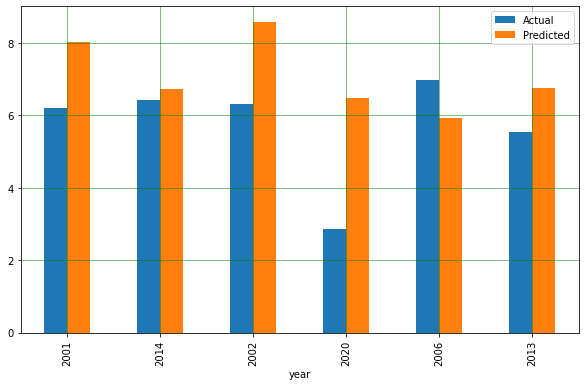

In [73]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [118]:
print('RMSE test dataset:', mean_squared_error(y_test1, yhat_test1, squared=False))
print('MSE test dataset:', mean_squared_error(y_test1, yhat_test1))
print('MAE test dataset:', mean_absolute_error(y_test1, yhat_test1))

RMSE test dataset: 3.4074918160274192
MSE test dataset: 11.611000476293839
MAE test dataset: 3.003086931440606


In [30]:
from sklearn.linear_model import Lasso

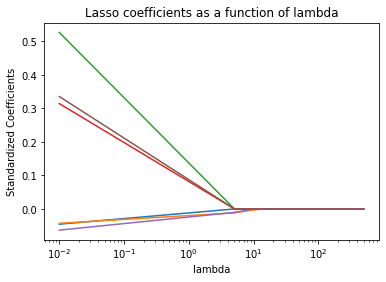

In [35]:
lambdas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in lambdas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of lambda');

In [36]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=12, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=12)

In [37]:
model.alpha_

0.9011676274188942

In [38]:
# Set best lambda
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.9011676274188942)

In [39]:
print(list(zip(lasso_best.coef_, X)))

[(-0.00918031450729672, 'INF'), (-0.021842531180833288, 'TRADE'), (0.0, 'H1'), (0.0, 'IND'), (-0.040763745463057575, 'M1'), (0.0, 'FDI')]


In [40]:
yhat_test2 = lasso_best.predict(X_test)

In [68]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': yhat_test2})
df_temp.head()

,Actual,Predicted
year,,
2001,6.192893,7.085111
2014,6.422247,6.841004
2002,6.320821,7.515644
2020,2.865412,6.489863
2006,6.977955,6.342175


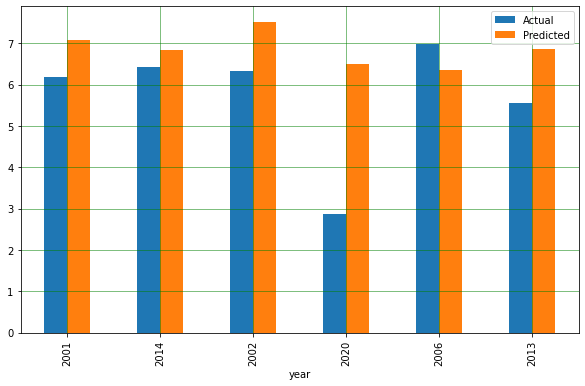

In [69]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [41]:
print('RMSE test dataset:', mean_squared_error(y_test, yhat_test2, squared=False))
print('MSE test dataset:', mean_squared_error(y_test, yhat_test2))
print('MAE test dataset:', mean_absolute_error(y_test, yhat_test2))

RMSE test dataset: 1.7137117901639218
MSE test dataset: 2.936808099746834
MAE test dataset: 1.3437589607105795


In [76]:
# Lasso with 5 fold cross-validation
model1 = LassoCV(cv=5, random_state=12, max_iter=10000)

# Fit model
model1.fit(X_train1, y_train1)

LassoCV(cv=5, max_iter=10000, random_state=12)

In [77]:
model1.alpha_

0.6484866052321772

In [78]:
lasso_best1 = Lasso(alpha=model1.alpha_)
lasso_best1.fit(X_train1, y_train1)

Lasso(alpha=0.6484866052321772)

In [83]:
print(list(zip(lasso_best1.coef_, X1)))

[(-0.19471996559183888, 'GDP'), (0.012585235595486, 'TRADE'), (-4.101007991019155, 'H1'), (0.0, 'IND'), (-0.1322903393609397, 'M1'), (0.544453984044504, 'FDI')]


In [80]:
yhat_test21 = lasso_best1.predict(X_test1)

In [119]:
print('RMSE test dataset:', mean_squared_error(y_test1, yhat_test21, squared=False))
print('MSE test dataset:', mean_squared_error(y_test1, yhat_test21))
print('MAE test dataset:', mean_absolute_error(y_test1, yhat_test21))

RMSE test dataset: 3.2083271130597057
MSE test dataset: 10.293362864394025
MAE test dataset: 2.6750827648485824


In [81]:
df_temp = pd.DataFrame({'Actual': y_test1, 'Predicted': yhat_test21})
df_temp.head()

,Actual,Predicted
year,,
2001,-0.431545,5.133583
2014,4.084554,3.580497
2002,3.830828,7.488065
2020,3.220934,6.738337
2006,7.418017,8.169720


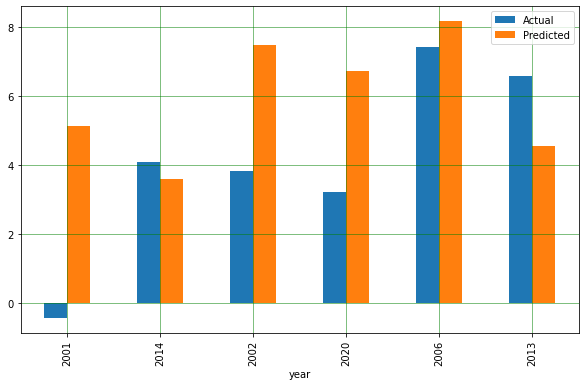

In [82]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [104]:
lst_k = [] #danh sách các giá trị k
lst_ac = [] #danh sách các độ chính xác tương ứng với các giá trị k
for k in range(2, 8): #np.sqrt(X_train.shape[0])/2
    lst_k.append(k)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    yhat_test = knn.predict(X_test)
    score = knn.score(X_test,y_test)
    lst_ac.append(score)
    
    print('K =', k,'- R^2 score:', score)

K = 2 - R^2 score: -0.9737089985756828
K = 3 - R^2 score: -0.841239440201911
K = 4 - R^2 score: -0.7581057835862748
K = 5 - R^2 score: -0.7643352077312324
K = 6 - R^2 score: -0.597162665405798
K = 7 - R^2 score: -0.4532024809896582


In [105]:
vitri = lst_ac.index(max(lst_ac))
k_best = lst_k[vitri]
print('Giá trị K phù hợp nhất là', k_best,'với R^2 score là', lst_ac[vitri])

Giá trị K phù hợp nhất là 7 với R^2 score là -0.4532024809896582


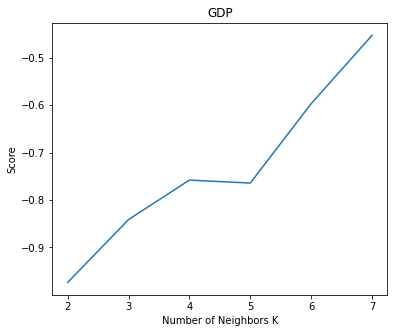

In [106]:
plt.figure(figsize=(6,5))
plt.plot(lst_k, lst_ac)
plt.title('GDP')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Score')
plt.show()

In [111]:
model_knn = KNeighborsRegressor(n_neighbors=7)

In [112]:
model_knn.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=7)

In [113]:
yhat_test3 = model_knn.predict(X_test1)

In [114]:
df_temp = pd.DataFrame({'Actual': y_test1, 'Predicted': yhat_test3})
df_temp.head()

,Actual,Predicted
year,,
2001,-0.431545,5.512397
2014,4.084554,7.689770
2002,3.830828,7.643681
2020,3.220934,6.141084
2006,7.418017,5.483615


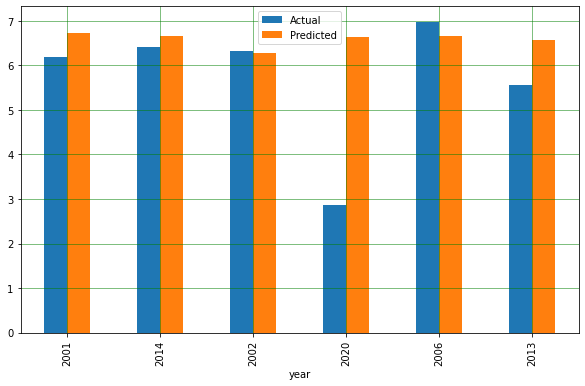

In [67]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [115]:
print('RMSE test dataset:', mean_squared_error(y_test1, yhat_test3, squared=False))
print('MSE test dataset:', mean_squared_error(y_test1, yhat_test3))
print('MAE test dataset:', mean_absolute_error(y_test1, yhat_test3))

RMSE test dataset: 3.589174821942085
MSE test dataset: 12.882175902462997
MAE test dataset: 3.280929543054876


In [52]:
import VisualizeNN as VisNN
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [138]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train1)
X_testscaled=sc_X.transform(X_test1)

In [139]:
list_i=[]
list_RMSE=[]
for i in range (1,7):
    regr = MLPRegressor(hidden_layer_sizes=(i,),random_state=12, max_iter=1000).fit(X_trainscaled, y_train)
    y_pred = regr.predict(X_testscaled)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test1, y_pred))
    list_i.append(i)
    list_RMSE.append(RMSE)

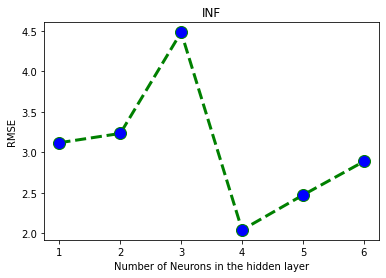

In [140]:
plt.plot(list_i,list_RMSE,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('INF')
plt.xlabel('Number of Neurons in the hidden layer')
plt.ylabel('RMSE')
plt.show()

In [141]:
regr = MLPRegressor(hidden_layer_sizes=(4,),random_state=12, max_iter=1000).fit(X_trainscaled, y_train)

In [142]:
network_structure = np.hstack(([X_trainscaled.shape[1]], np.asarray(regr.hidden_layer_sizes), [1]))

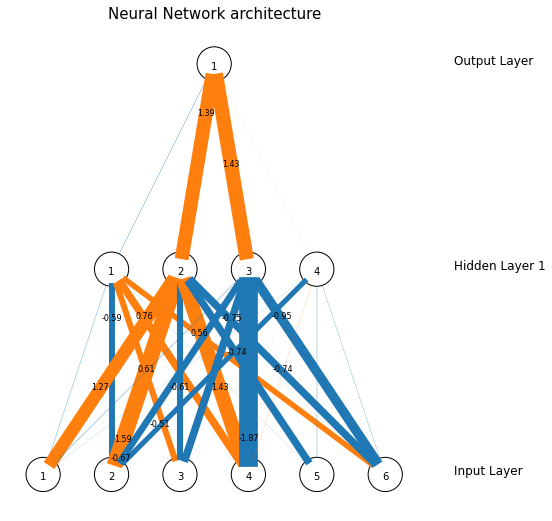

In [143]:
network=VisNN.DrawNN(network_structure, regr.coefs_)
network.draw()

In [59]:
regr.coefs_

[array([[-0.12846733, -0.12779606,  0.38285784,  0.64949198, -1.54166974,
          0.6489287 ],
        [ 0.17373046, -0.9676966 ,  0.32298504, -0.47830402,  0.57739959,
          0.69386712],
        [ 0.25045821,  0.84579991, -1.61331064, -0.83139579,  0.91312604,
         -0.25407184],
        [ 0.12557026, -0.40381912,  1.20188838, -0.66104677, -1.07388501,
         -0.42408494],
        [ 0.13634187, -0.40465984,  0.5976831 ,  0.72280789, -1.12654803,
         -0.06952229],
        [ 0.20234993, -1.16641386, -1.19071622,  1.25811149,  0.47206182,
          0.76267511]]),
 array([[-0.24944534],
        [ 1.50066905],
        [ 0.86485547],
        [ 0.50511209],
        [ 0.69214051],
        [ 0.29568305]])]

In [144]:
y_pred = regr.predict(X_testscaled)
y_pred

array([3.23379459, 4.40946431, 4.96121562, 2.44215393, 7.49226674,
       3.49902897])

In [150]:
df_temp = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred})
df_temp.head(7)

,Actual,Predicted
year,,
2001,-0.431545,3.233795
2014,4.084554,4.409464
2002,3.830828,4.961216
2020,3.220934,2.442154
2006,7.418017,7.492267
2013,6.592675,3.499029


In [146]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred))  


Root Mean Squared Error: 2.0412703823107634
Mean Squared Error: 4.16678477369913
Mean Absolute Error: 1.511218664652467


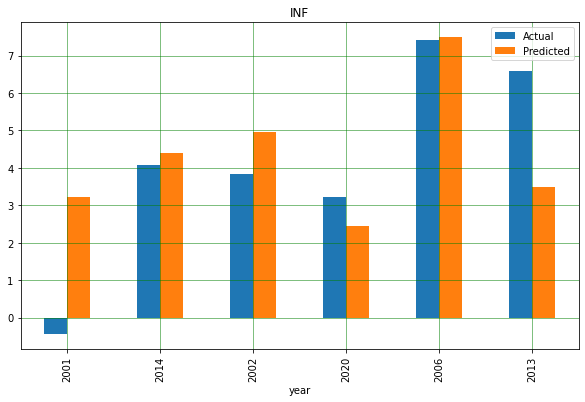

In [147]:
df_temp = df_temp.head(30)


df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('INF')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

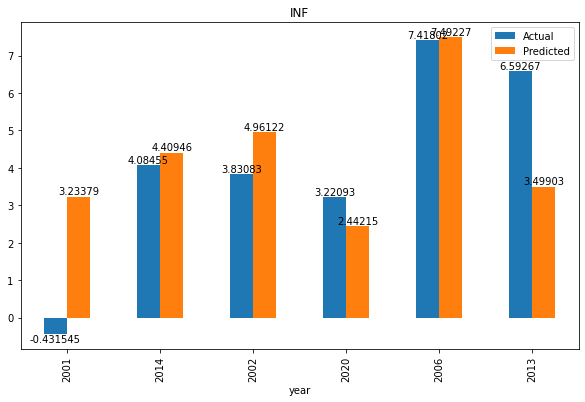

In [149]:
ax = df_temp.plot.bar(figsize=(10,6))
for container in ax.containers:
    ax.bar_label(container)
plt.title('INF')
plt.show()